In [ ]:
import os
import pandas as pd
from skimage.transform import resize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


이미지의 해상도: (900, 900, 3)


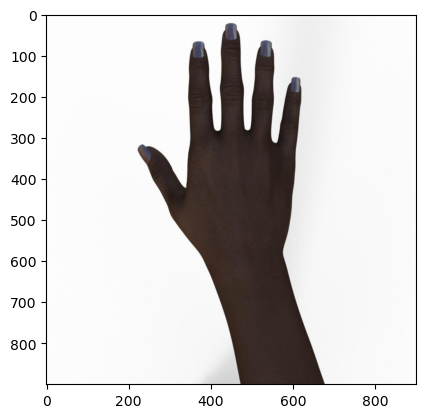

In [ ]:
img = Image.open("가위바위보/test/paper/paper-hires1_png.rf.bf14bb5fd86e4d28a00897e40459f192.jpg")
img = np.asarray(img)
print('이미지의 해상도:', img.shape)
# 이미지 출력하기
plt.imshow(img)
plt.show()

In [ ]:
path = "가위바위보/"
train_paper = os.listdir(path + "train/paper")
train_rock = os.listdir(path + "train/rock")
train_scissors = os.listdir(path + "train/scissors")
print('train_paper 이미지의 개수:', len(train_paper))
print('train_rock 이미지의 개수:', len(train_rock))
print('train_scissors 이미지의 개수:', len(train_scissors))

print('train 이미지의 총 개수:', len(train_paper)+len(train_rock)+len(train_scissors))
valid_paper = os.listdir(path + "valid/paper")
valid_rock = os.listdir(path + "valid/rock")
valid_scissors = os.listdir(path + "valid/scissors")
test_paper = os.listdir(path + "test/paper")
test_rock = os.listdir(path + "test/rock")
test_scissors = os.listdir(path + "test/scissors")

print('valid 이미지의 개수:', len(valid_paper)*3)
print('test 이미지의 개수:', len(test_paper)*3)

train_paper 이미지의 개수: 840
train_rock 이미지의 개수: 840
train_scissors 이미지의 개수: 840
train 이미지의 총 개수: 2520
valid 이미지의 개수: 372
test 이미지의 개수: 33


In [ ]:
X_train = []
y_train = []

# label
# 0: 보자기
# 1: 바위
# 2: 가위
for file in train_paper:
    img = Image.open(path + 'train/paper/' + file)
    img = np.asarray(img)
    img = resize(img, (256, 256, 3))
    X_train.append(img)
    y_train.append(0)

for file in train_rock:
    img = Image.open(path + 'train/rock/' + file)
    img = np.asarray(img)
    img = resize(img, (256, 256, 3))
    X_train.append(img)
    y_train.append(1)

for file in train_scissors:
    img = Image.open(path + 'train/scissors/' + file)
    img = np.asarray(img)
    img = resize(img, (256, 256, 3))
    X_train.append(img)
    y_train.append(2)

X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape, y_train.shape)

(2520, 256, 256, 3) (2520,)


In [ ]:
X_val = []
y_val = []

# label
# 0: 보자기
# 1: 바위
# 2: 가위
for file in valid_paper:
    img = Image.open(path + 'valid/paper/' + file)
    img = np.asarray(img)
    img = resize(img, (256, 256, 3))
    X_val.append(img)
    y_val.append(0)

for file in valid_rock:
    img = Image.open(path + 'valid/rock/' + file)
    img = np.asarray(img)
    img = resize(img, (256, 256, 3))
    X_val.append(img)
    y_val.append(1)

for file in valid_scissors:
    img = Image.open(path + 'valid/scissors/' + file)
    img = np.asarray(img)
    img = resize(img, (256, 256, 3))
    X_val.append(img)
    y_val.append(2)

X_val = np.array(X_val)
y_val = np.array(y_val)
print(X_val.shape, y_val.shape)

(372, 256, 256, 3) (372,)


In [ ]:
X_test = []
y_test = []

# label
# 0: 보자기
# 1: 바위
# 2: 가위
for file in test_paper:
    img = Image.open(path + 'test/paper/' + file)
    img = np.asarray(img)
    img = resize(img, (256, 256, 3))
    X_test.append(img)
    y_test.append(0)

for file in test_rock:
    img = Image.open(path + 'test/rock/' + file)
    img = np.asarray(img)
    img = resize(img, (256, 256, 3))
    X_test.append(img)
    y_test.append(1)

for file in test_scissors:
    img = Image.open(path + 'test/scissors/' + file)
    img = np.asarray(img)
    img = resize(img, (256, 256, 3))
    X_test.append(img)
    y_test.append(2)

X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(33, 256, 256, 3) (33,)


In [ ]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (2520, 256, 256, 3)
학습 레이블: (2520,)
검증 이미지: (372, 256, 256, 3)
검증 레이블: (372,)


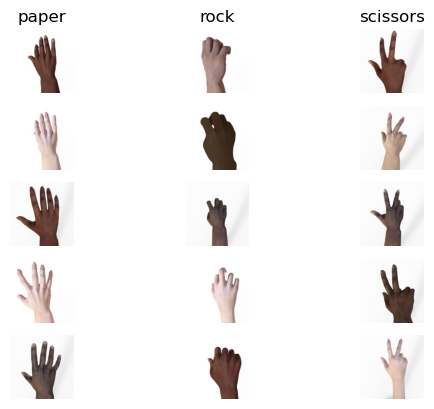

In [ ]:
# 데이터셋에서 각 클래스에 따른 일부 데이터를 시각화합니다.
classes = ['paper', 'rock', 'scissors']
# 각 클래스마다 특정 개수의 이미지를 출력합니다.
samples_per_class = 5

# 데이터 시각화 함수 구현
def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes): # 각 클래스를 (클래스, 클래스명) 형식으로 순회
        idxs = np.flatnonzero(y_train == y) # 해당 클래스를 갖는(True 값을 갖는) 데이터 인덱스 계산
        idxs = np.random.choice(idxs, samples_per_class, replace=False) # 특정 개수만큼 무작위로 선택
        for i, idx in enumerate(idxs): # 하나씩 이미지를 확인하며
            plt_idx = i * num_classes + y + 1 # 이미지를 출력할 위치: 각 열(column)에 차례대로 출력하도록 설정
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx])
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

visualize_data(X_train, classes, samples_per_class)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

In [ ]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (2520, 196608)
학습 레이블: (2520,)
검증 이미지: (372, 196608)
검증 레이블: (372,)


In [ ]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time() # 시작 시간

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10) #10 실패
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 24.025891065597534


/Users/mc/opt/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.9103174603174603
검증 데이터셋 정확도: 0.6801075268817204
클래스: [0 1 2]
반복 횟수: [10]
학습된 가중치 크기: (3, 196608)


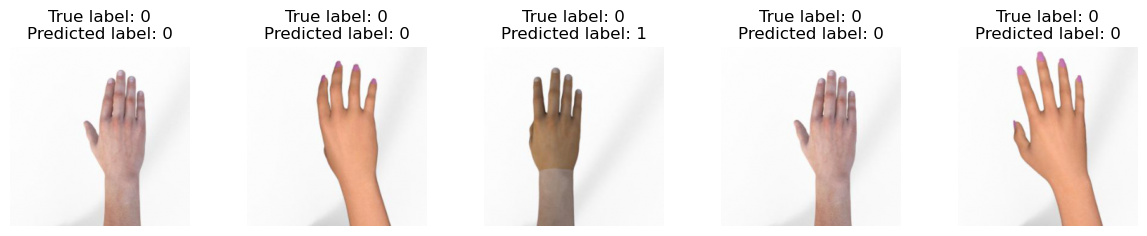

In [ ]:
max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val[:max_cnt], y_val[:max_cnt], model.predict(X_val[:max_cnt])):
    ax.imshow(np.reshape(image, (256, 256, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

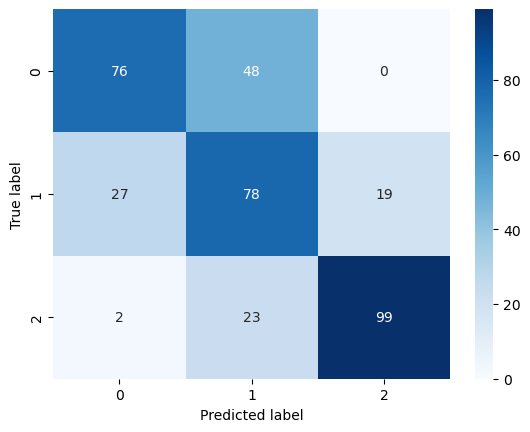

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns     

cm = confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# Seaborn heatmeap을 이용하여 화면에 출력하기
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.show()

#제일 예측을 못하는 것?
# 0번 : 숫자가 가장 작다. 비율과 숫자가 가장 작기 때문.
# 4번 : 분포 자체가 0번보다 크긴 한데 분산이 크다. 많이 퍼져있다.
#제일 예측을 잘한 것?
# 1번 : 나머지와 차이가 가장 크다.

In [ ]:
from sklearn.linear_model import LogisticRegression


for iter in [10, 30, 50, 100, 200, 300]:
    start_time = time.time() # 시작 시간

    model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
    model.fit(X_train, y_train)

    print("====================================================")
    print(f'[학습 완료(max_iter={iter})]')

    y_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred)
    print('학습 데이터셋 정확도:', train_acc)

    y_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

/Users/mc/opt/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=10)]
학습 데이터셋 정확도: 0.9103174603174603
검증 데이터셋 정확도: 0.6801075268817204
소요된 시간(초 단위): 22.74452805519104


/Users/mc/opt/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=30)]
학습 데이터셋 정확도: 0.9865079365079366
검증 데이터셋 정확도: 0.6397849462365591
소요된 시간(초 단위): 59.69785189628601


/Users/mc/opt/anaconda3/envs/kaggle/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=50)]
학습 데이터셋 정확도: 1.0
검증 데이터셋 정확도: 0.6344086021505376
소요된 시간(초 단위): 93.804270029068


KeyboardInterrupt: 

In [ ]:
from scipy.ndimage.interpolation import shift
from scipy.ndimage import rotate

def shift_image(image, dx, dy):
    image = image.reshape((256, 256, 3))
    # dy, dx는 각각 너비, 높이 기준으로 이동할 크기
    shifted_image = shift(image, [dy, dx, 0])
    return shifted_image.reshape([-1])


def horizontal_flip(image):
    image = image.reshape((256, 256, 3))
    # 수직 반전(vertical flip): axis=0, 수평 반전(horizontal flip): axis=1
    flipped_image = np.flip(image, axis=1)
    return flipped_image.reshape([-1])

def rotate_image(image, angle):
    image = image.reshape((256, 256, 3))
    rotated_image = rotate(image, angle, reshape = False)
    return rotated_image.reshape([-1])

/var/folders/gw/5wvfghw125s92dqr86nzqpw40000gn/T/ipykernel_75269/3968902026.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


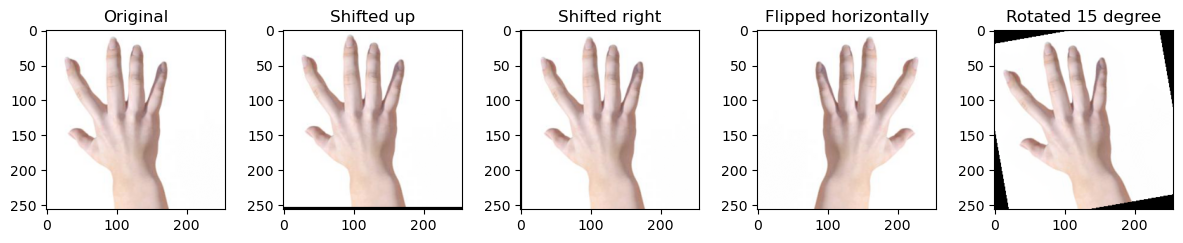

In [ ]:
# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, 5)
fig.set_size_inches(12, 4)
fig.tight_layout()

image = X_train[0]
shifted_image_up = shift_image(image, 0, -3)
shifted_image_right = shift_image(image, 3, 0)
flipped_image = horizontal_flip(image)
rotated_image = rotate_image(image, 10)

# 출력할 때는 이미지 해상도에 맞게 재변형
axes[0].imshow(np.reshape(image, (256, 256, 3)))
axes[0].set_title('Original')
axes[1].imshow(np.reshape(shifted_image_up, (256, 256, 3)))
axes[1].set_title('Shifted up')
axes[2].imshow(np.reshape(shifted_image_right, (256, 256, 3)))
axes[2].set_title('Shifted right')
axes[3].imshow(np.reshape(flipped_image, (256, 256, 3)))
axes[3].set_title('Flipped horizontally')
axes[4].imshow(np.reshape(rotated_image, (256, 256, 3)))
axes[4].set_title('Rotated 15 degree')

plt.show()

In [ ]:
import random

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# 이미지를 하나씩 확인하며 변형된 이미지 추가
cnt = 0
for image, label in zip(X_train, y_train):
    dx = random.uniform(1, 3)
    dy = random.uniform(1, 3)
    X_train_augmented.append(shift_image(image, dx, dy))
    y_train_augmented.append(label)
    X_train_augmented.append(horizontal_flip(image))
    y_train_augmented.append(label)
    X_train_augmented.append(rotate_image(image, 10))
    y_train_augmented.append(label)
    X_train_augmented.append(rotate_image(image, -10))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 증진된 데이터들을 섞기(shuffle)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_augmented)

X_train_augmented_scaled = scaler.transform(X_train_augmented)
X_val_scaled = scaler.transform(X_val)

In [ ]:
for iter in [10, 30, 50, 100]:
    start_time = time.time() # 시작 시간

    model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter, C=0.1)
    model.fit(X_train_augmented_scaled, y_train_augmented)

    print("====================================================")
    print(f'[학습 완료(max_iter={iter})]')

    y_pred = model.predict(X_train_augmented_scaled)
    train_acc = accuracy_score(y_train_augmented, y_pred)
    print('학습 데이터셋 정확도:', train_acc)

    y_pred = model.predict(X_val_scaled)
    val_acc = accuracy_score(y_val, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")